## Code

The _kmeans_ function requires that k (number of clusters) is specified. For two-dimensional data or data with exactly two columns, the function will display a visualization of the clusters where each color correspond to a unique cluster.

In [16]:
# %load kmeans.py
import numpy as np
import matplotlib.pyplot as plt

def kmeans(data, k=-1):
    """A function that performs k-means clustering given an mxn input NumPy array."""
    if k < 0:
        print("Please enter a valid k value")
    else:
        cluster_labels = np.zeros(data.shape[0], dtype=float)
        cluster_labels = kmeans_proc(data, int(k))

    return cluster_labels

def kmeans_proc(data, k):
    """A function that performs the k-means procedure"""
    # Number of columns (m) and number of rows (n)
    m = data.shape[0]
    n = data.shape[1]
    
    # Array that contains the cluster classification of each observation
    labels = np.zeros(m, dtype=float)
    new_labels = np.zeros(m, dtype=float)
    
    # Array that contains the distance of each observation to the cluster centroid of its current cluster
    distances = np.zeros(m, dtype=float)
    
    # Select initial k cluster centers from the set of observations using random sampling
    np.random.seed(100)
    cluster_centers = data[np.random.choice(m, k, replace=False)]

    # Procedure will continue until there are observations that 'migrates' to another cluster
    n_migrations = 1
    while n_migrations != 0:

        # Compute distances of each observation to the cluster centroids
        for i in range(0, m):
            dist = compute_cluster_dist(data[i], cluster_centers)
            
            # Assigns each observation to the cluster with minimum centroid distance
            new_labels[i] = np.argmin(dist)
        
            # Stores the distance of each observation to its current cluster centroid
            distances[i] = np.min(dist)
            
        # Checks how many observations migrated to another cluster
        n_migrations = sum(labels != new_labels)

        # Assign the newly computed labels as the current label
        labels = new_labels.copy()

        # Computed the sum of square distances of each observation from their corresponding cluster centers
        variance = sum(map(lambda x:x*x, distances))
        
        # Computes for the new cluster centers
        if(n_migrations != 0): 
            for i in range(0, k):
                temp_sum = np.zeros(n)
                for j in range(0, m):
                    if (labels[j] == i):
                        temp_sum += data[j]
                cluster_centers[i] = temp_sum / len(labels[labels == i])
        
    return labels

def compute_cluster_dist(obs, cluster_centers):
    """A function that computes the distances of an obsevation to the cluster centers"""
    m = len(cluster_centers)
    dist = np.zeros(m)
    
    # Computes the eulidean distance of each observation to each cluster centers.
    for i in range(0, m):
        dist[i] = compute_euclidean_dist(obs, cluster_centers[i])
        
    return dist

def compute_euclidean_dist(arr1, arr2):
    """A function that computes the euclidean distance between two points"""
    sum_sqdiff = 0
    for i in range(0, len(arr1)):
        sum_sqdiff += (arr1[i] - arr2[i]) ** 2
    return np.sqrt(sum_sqdiff)

## Sample Usage # 1 - Sample Data 1 (2D, 300 observations, 3 clusters)

In [8]:
sample_data_1 = np.genfromtxt('sample_data_1.csv', delimiter=',', dtype=float)

Plot of input data before clustering

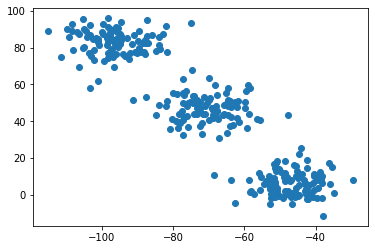

In [9]:
plt.scatter(sample_data_1[:,0], sample_data_1[:,1])

### We now use the kmeans function with k=3.

K-value is: 3
Labels: 
[0. 2. 0. 0. 0. 1. 1. 2. 1. 2. 2. 1. 2. 2. 2. 1. 2. 1. 1. 2. 0. 2. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 1. 1. 2. 1. 2. 2. 1. 2. 0. 2. 0. 1. 0. 0. 2. 1. 1.
 0. 2. 2. 2. 0. 1. 1. 1. 2. 1. 2. 0. 2. 0. 0. 0. 2. 2. 0. 2. 0. 0. 2. 1.
 0. 2. 2. 1. 2. 1. 1. 0. 1. 0. 2. 2. 1. 0. 0. 0. 2. 0. 2. 0. 2. 1. 2. 0.
 1. 0. 0. 2. 0. 2. 2. 1. 2. 1. 2. 2. 0. 2. 2. 1. 1. 1. 1. 1. 1. 2. 0. 0.
 1. 2. 1. 2. 2. 0. 1. 1. 2. 1. 2. 2. 2. 0. 0. 2. 1. 1. 2. 0. 1. 1. 1. 1.
 0. 1. 0. 2. 1. 2. 2. 2. 0. 1. 0. 1. 1. 2. 2. 2. 1. 1. 1. 1. 1. 0. 1. 2.
 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 2. 1. 2. 0. 0. 2. 0. 0. 2. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 2. 1. 0. 2. 2. 0. 1. 1. 0. 0. 2. 1. 1. 2. 1. 0. 0.
 0. 2. 1. 0. 2. 1. 0. 2. 2. 2. 1. 2. 0. 2. 0. 2. 1. 0. 2. 0. 1. 2. 0. 0.
 1. 0. 2. 2. 0. 2. 2. 0. 1. 0. 0. 1. 0. 0. 0. 2. 2. 0. 2. 0. 1. 0. 2. 1.
 0. 0. 0. 0. 1. 1. 2. 2. 0. 0. 1. 0. 2. 0. 2. 2. 2. 0. 2. 2. 2. 0. 1. 2.
 2. 0. 1. 1. 1. 1. 2. 0. 1. 1. 1. 1.]


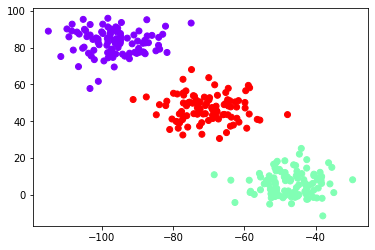

In [37]:
# kmeans clustering
k = 3
labels = kmeans(sample_data_1, k)

print("K-value is: " + str(k))
print("Labels: \n" + str(labels))

fig = plt.figure()
plt.scatter(sample_data_1[:,0], sample_data_1[:,1], c=labels, cmap='rainbow')
plt.show()

Each color represents a unique cluster. We could also try different values for k. Here is for k=4.

K-value is: 4
Labels: 
[2. 3. 0. 2. 2. 1. 1. 3. 1. 3. 3. 1. 3. 3. 3. 1. 3. 1. 1. 3. 2. 3. 2. 2.
 1. 1. 0. 2. 1. 0. 0. 1. 1. 3. 1. 3. 3. 1. 3. 0. 3. 2. 1. 0. 2. 3. 1. 1.
 2. 3. 3. 3. 2. 1. 1. 1. 3. 1. 3. 0. 3. 2. 2. 2. 3. 3. 2. 3. 0. 2. 3. 1.
 2. 3. 3. 1. 3. 1. 1. 0. 1. 2. 3. 3. 1. 2. 2. 0. 3. 2. 3. 2. 3. 1. 3. 2.
 1. 0. 0. 3. 2. 3. 3. 1. 3. 1. 3. 3. 2. 3. 3. 1. 1. 1. 1. 1. 1. 3. 2. 0.
 1. 3. 1. 3. 3. 0. 1. 1. 3. 1. 3. 3. 3. 2. 0. 3. 1. 1. 3. 0. 1. 1. 1. 1.
 2. 1. 0. 3. 1. 3. 3. 3. 0. 1. 2. 1. 1. 3. 3. 3. 1. 1. 1. 1. 1. 0. 1. 3.
 1. 2. 1. 2. 1. 1. 1. 2. 1. 2. 3. 1. 3. 2. 0. 3. 0. 2. 3. 0. 1. 2. 0. 1.
 2. 1. 1. 2. 0. 1. 1. 3. 1. 2. 3. 3. 2. 1. 1. 2. 0. 3. 1. 1. 3. 1. 0. 0.
 2. 3. 1. 2. 3. 1. 0. 3. 3. 3. 1. 3. 2. 3. 2. 3. 1. 0. 3. 0. 1. 3. 0. 2.
 1. 2. 3. 3. 0. 3. 3. 2. 1. 0. 0. 1. 2. 0. 0. 3. 3. 0. 3. 2. 1. 2. 3. 1.
 0. 2. 2. 0. 1. 1. 3. 3. 0. 0. 1. 0. 3. 2. 3. 3. 3. 0. 3. 3. 3. 2. 1. 3.
 3. 0. 1. 1. 1. 1. 3. 0. 1. 1. 1. 1.]


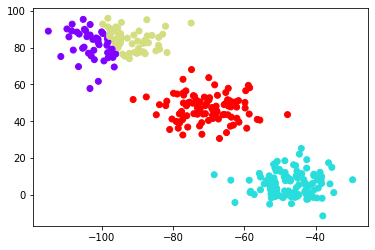

In [38]:
# kmeans clustering
k = 4
labels = kmeans(sample_data_1, k)
print("K-value is: " + str(k))
print("Labels: \n" + str(labels))
fig = plt.figure()
plt.scatter(sample_data_1[:,0], sample_data_1[:,1], c=labels, cmap='rainbow')
plt.show()

## Sample Usage # 2 - Sample Data 1 (2D, 200 observations, 3 clusters)

In [32]:
sample_data_2 = np.genfromtxt('sample_data_2.csv', delimiter=',', dtype=float)

Plot of input data before clustering

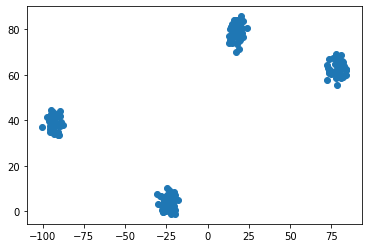

In [33]:
plt.scatter(sample_data_2[:,0], sample_data_2[:,1])

K-value is: 4
Labels: 
[2. 3. 2. 3. 1. 1. 2. 1. 3. 2. 0. 1. 0. 0. 0. 2. 1. 3. 2. 1. 3. 2. 1. 0.
 0. 3. 0. 0. 3. 2. 2. 3. 1. 0. 3. 3. 3. 0. 2. 1. 3. 0. 0. 0. 3. 1. 3. 0.
 3. 3. 2. 2. 3. 2. 0. 0. 0. 3. 0. 0. 1. 2. 0. 3. 1. 1. 1. 2. 0. 1. 3. 1.
 2. 3. 1. 0. 3. 0. 0. 0. 1. 1. 1. 3. 3. 0. 2. 1. 1. 1. 2. 3. 3. 1. 1. 1.
 3. 3. 3. 2. 2. 2. 0. 0. 2. 1. 1. 2. 1. 2. 1. 3. 2. 0. 0. 3. 1. 3. 0. 2.
 0. 2. 0. 1. 2. 1. 3. 3. 2. 2. 1. 0. 2. 0. 0. 1. 2. 2. 3. 1. 0. 3. 1. 3.
 1. 2. 2. 1. 1. 1. 0. 1. 2. 0. 3. 3. 0. 1. 2. 2. 1. 2. 2. 2. 3. 1. 2. 3.
 0. 2. 3. 3. 3. 3. 0. 2. 0. 0. 1. 0. 2. 1. 3. 0. 2. 0. 0. 3. 3. 1. 3. 0.
 2. 2. 1. 0. 2. 1. 2. 3.]


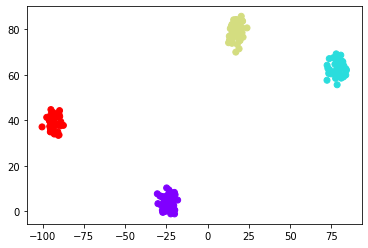

In [39]:
# kmeans clustering
k = 4
labels = kmeans(sample_data_2, k)

print("K-value is: " + str(k))
print("Labels: \n" + str(labels))

fig = plt.figure()
plt.scatter(sample_data_2[:,0], sample_data_2[:,1], c=labels, cmap='rainbow')
plt.show()

Each unique color represents a unique cluster.

## Sample Usage # 3 - Data with more than 2 dimensions (200x4 data)

For data with more than 2 dimensions, the plots will not show but will still output the clusters labels.

In [40]:
sample_data_3 = np.genfromtxt('sample_data_3.csv', delimiter=',', dtype=float)

In [41]:
# First 5 observations of sample_data_3
sample_data_3[1:5]

array([[ 23.29128965, -60.61239329, -42.02262713,  40.19408704],
       [-94.95971522,  39.32208113, -27.13987136,   2.70119503],
       [ 54.48951272,  72.76703601,  56.86822956, -92.72090168],
       [ 58.23072259,  69.33323259,  54.13995178, -93.77315629]])

In [43]:
# kmeans clustering
labels = kmeans(sample_data_3, k=4)

print("K-value is: " + str(k))
print("Labels: \n" + str(labels))

K-value is: 4
Labels: 
[2. 1. 2. 0. 0. 1. 1. 0. 3. 2. 1. 0. 3. 2. 1. 3. 1. 0. 1. 3. 0. 2. 1. 3.
 1. 1. 2. 2. 2. 2. 2. 2. 1. 0. 0. 1. 1. 3. 2. 2. 1. 2. 0. 2. 3. 3. 1. 0.
 3. 3. 2. 0. 3. 2. 3. 0. 0. 3. 0. 1. 2. 3. 3. 2. 0. 0. 2. 1. 3. 1. 3. 0.
 0. 2. 3. 1. 3. 3. 2. 0. 3. 1. 1. 0. 3. 2. 0. 0. 1. 1. 3. 1. 0. 1. 2. 1.
 2. 3. 0. 2. 0. 3. 0. 1. 1. 3. 0. 1. 0. 3. 0. 3. 0. 2. 3. 2. 2. 1. 3. 0.
 1. 2. 1. 3. 2. 3. 0. 0. 3. 3. 1. 1. 0. 0. 2. 3. 3. 1. 0. 2. 1. 3. 0. 1.
 3. 3. 0. 0. 3. 1. 2. 3. 0. 2. 1. 0. 1. 1. 2. 2. 2. 0. 2. 2. 0. 3. 1. 3.
 1. 2. 1. 1. 0. 0. 2. 0. 0. 3. 2. 3. 2. 3. 0. 1. 1. 3. 2. 2. 2. 1. 2. 1.
 3. 0. 0. 3. 2. 2. 3. 1.]
